In [2]:
# EDA/Visualização de dados
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

### Carga de dados

In [3]:
df_laptop = pd.read_csv('./datasets/dataset_laptops.csv')

In [18]:
df_laptop.info()

<class 'pandas.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    str    
 2   model                     991 non-null    str    
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    str    
 6   processor_tier            991 non-null    str    
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    str    
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    str    
 13  gpu_type                  991 non-null    str    
 14  is_touch_screen      

### EDA

In [5]:
df_laptop.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,SSD,256,apple,apple,False,13.3,2560,1600,mac,1
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1


In [6]:
df_laptop.tail(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,1439.09,76,intel,core i7,10,16,16,SSD,1024,nvidia,dedicated,False,15.6,1920,1080,windows,2
982,994,asus,Asus Zenbook 14 OLED 2023 UM3402YA-KM551WS Lap...,935.36,68,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,14.0,2880,1800,windows,1
983,995,asus,Asus Vivobook 16 2023 M1605YA-MB551WS Laptop (...,803.44,65,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,16.0,1920,1200,windows,1
984,996,asus,Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...,719.48,64,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,16.0,1920,1200,windows,1
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,905.50,67,amd,ryzen 7,8,16,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,14.0,2560,1600,windows,1
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,251.74,37,intel,celeron,2,2,4,HDD,128,intel,integrated,False,15.6,1366,768,chrome,1


In [17]:
df_laptop.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,is_touch_screen,display_size,resolution_width,resolution_height,year_of_warranty
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,0.088799,15.171241,2003.503532,1181.227043,1.083754
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.284597,0.938089,361.965292,263.884019,0.311478
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000,1.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000,1.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000,1.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000,1.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,1.000000,18.000000,3840.000000,2560.000000,3.000000


In [15]:
# checar 'year_of_warranty'
df_laptop['year_of_warranty'].unique()

array([1, 2, 3])

In [12]:
# ajustar "year_of_warranty"
df_laptop.loc[df_laptop['year_of_warranty'] == 'No information', 'year_of_warranty'] = '1'
df_laptop['year_of_warranty'] = df_laptop['year_of_warranty'].astype(int)

In [16]:
# ajustar 'is_touch_screen'
df_laptop['is_touch_screen'] = df_laptop['is_touch_screen'].astype(int)

In [ ]:
# Distribuição de 'brand'
porcentagem_brand = df_laptop['brand'].value_counts() / len(df_laptop) * 100
px.bar(porcentagem_brand, color=porcentagem_brand.index)

In [ ]:
# Distribuição de 'processor_brand'
porcentagem_processor_brand = df_laptop['processor_brand'].value_counts() / len(df_laptop) * 100
px.bar(porcentagem_processor_brand, color=porcentagem_processor_brand.index)

<Axes: xlabel='price', ylabel='Count'>

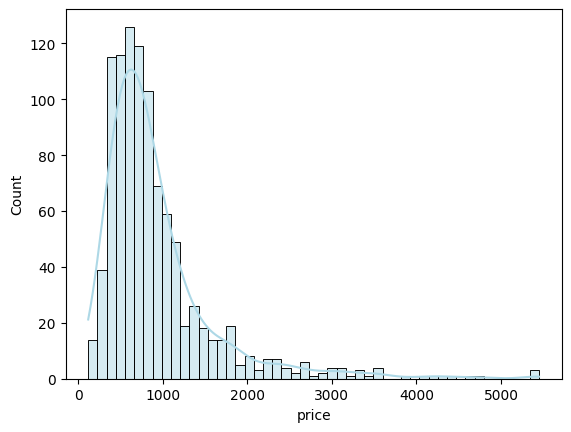

In [22]:
# Distribuição de 'price'
sns.histplot(df_laptop['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

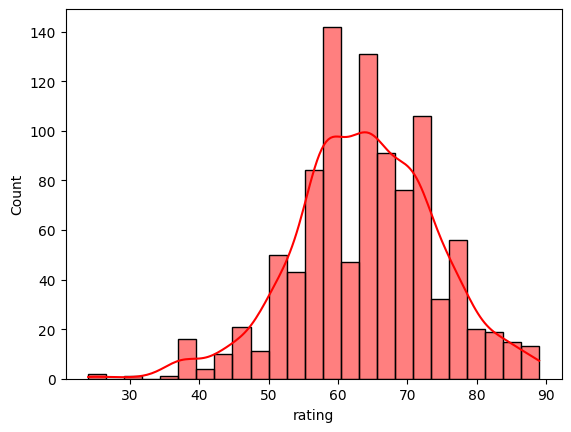

In [24]:
# Distribuição de 'rating'
sns.histplot(df_laptop['rating'], kde=True, color='red')

In [ ]:
# Box-plot de distribuição entre 'brand' X 'price'
px.box(df_laptop, x='price', y='brand', color='brand', orientation='h')

In [29]:
# Box-plot de distribuição entre 'brand' X 'rating'
px.box(df_laptop, x='rating', y='brand', color='brand', orientation='h')

In [32]:
# Box-plot de distribuição entre 'price' X 'rating'
px.scatter(df_laptop, x='price', y='rating', color='brand')